<a href="https://colab.research.google.com/github/1603073/image-processing/blob/main/edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import image as mimg
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

def convolve2d(image, kernel):
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1,1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

def convolve(image, kernel):
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1,1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+2, x: x+2]).sum()

    return output

 


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


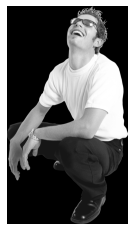

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/images/33-man.png'
image = cv2.imread(path,0)
#cv2_imshow(image)
plt.imshow(image, cmap='gray'), plt.axis('off')
plt.show()

prewit operator

(<matplotlib.axes._subplots.AxesSubplot at 0x7f216bf3b250>,
 Text(0.5, 1.0, 'Prewitt-y'),
 (-0.5, 1827.5, 3308.5, -0.5))

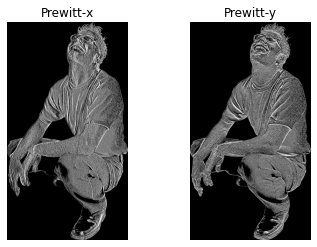

In [ ]:
kernel_y = np.array([[-1,-1,-1], [0,0,0],[1,1,1]])
kernel_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_x = convolve2d(image,kernel_x)
prewitt_y = convolve2d(image,kernel_y)
plt.subplot(1,2,1), plt.imshow(prewitt_x, cmap='gray'), plt.title("Prewitt-x"),plt.axis('off')
plt.subplot(1,2,2), plt.imshow(prewitt_y, cmap='gray'), plt.title("Prewitt-y"),plt.axis('off')


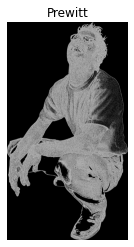

In [ ]:
prewitt = (prewitt_x**2 + prewitt_y**2)**0.5
plt.imshow(prewitt, cmap='gray'), plt.title('Prewitt'), plt.axis('off')
plt.show()

sobel operator


(<matplotlib.axes._subplots.AxesSubplot at 0x7f3070893850>,
 Text(0.5, 1.0, 'sobel-y'),
 (-0.5, 1827.5, 3308.5, -0.5))

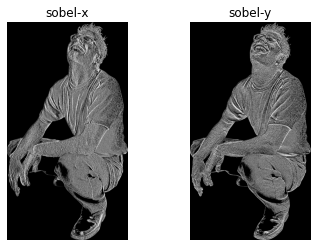

In [ ]:
sobel_kernel_x = np.array([[-1,0,1], [-2,0,2],[-1,0,1]])
sobel_kernel_y = np.array([[-1,-2,-1], [0,0,0],[1,2,1]])
sobel_x = convolve2d(image, sobel_kernel_x)
sobel_y = convolve2d(image, sobel_kernel_y)
plt.subplot(1,2,1), plt.imshow(sobel_x,cmap='gray'), plt.title('sobel-x'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(sobel_y, cmap='gray'), plt.title('sobel-y'), plt.axis('off')


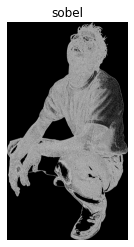

In [ ]:
sobel = (sobel_x**2 + sobel_y**2)**0.5
plt.imshow(sobel, cmap='gray'), plt.title('sobel'), plt.axis('off')
plt.show()

In [ ]:
compass operator 

In [ ]:
cop_1 = np.array([[1,1,0], [1,0,-1],[0,-1,-1]])
cop_2 = np.array([[1,1,1], [0,0,0],[-1,-1,-1]])
cop_3 = np.array([[0,1,1], [-1,0,1],[-1,-1,0]])
cop_4 = np.array([[1,0,-1], [1,0,-1],[1,0,-1]])
cop_5 = np.array([[-1,0,1], [-1,0,1],[-1,0,1]])
cop_6 = np.array([[0,-1,-1], [1,0,-1],[1,1,0]])
cop_7 = np.array([[-1,-1,-1], [0,0,0],[1,1,1]])
cop_8 = np.array([[-1,-1,0], [-1,0,1],[0,1,1]])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3070189e50>,
 (-0.5, 1827.5, 3308.5, -0.5))

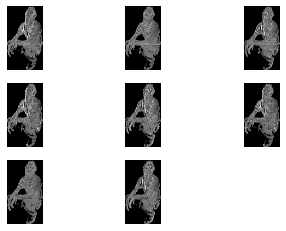

In [ ]:
compass1 = convolve2d(image, cop_1)
plt.subplot(3,3,1), plt.imshow(compass1, cmap='gray'), plt.axis('off')
compass2 = convolve2d(image, cop_2)
plt.subplot(3,3,2), plt.imshow(compass2, cmap='gray'), plt.axis('off')
compass3 = convolve2d(image, cop_3)
plt.subplot(3,3,3), plt.imshow(compass3, cmap='gray'), plt.axis('off')
compass4 = convolve2d(image, cop_4)
plt.subplot(3,3,4), plt.imshow(compass4, cmap='gray'), plt.axis('off')
compass5 = convolve2d(image, cop_5)
plt.subplot(3,3,5), plt.imshow(compass5, cmap='gray'), plt.axis('off')
compass6 = convolve2d(image, cop_6)
plt.subplot(3,3,6), plt.imshow(compass6, cmap='gray'), plt.axis('off')
compass7 = convolve2d(image, cop_7)
plt.subplot(3,3,7), plt.imshow(compass7, cmap='gray'), plt.axis('off')
compass8 = convolve2d(image, cop_8)
plt.subplot(3,3,8), plt.imshow(compass8, cmap='gray'), plt.axis('off')



laplacian operator


(<matplotlib.axes._subplots.AxesSubplot at 0x7f306fff9310>,
 (-0.5, 1827.5, 3308.5, -0.5))

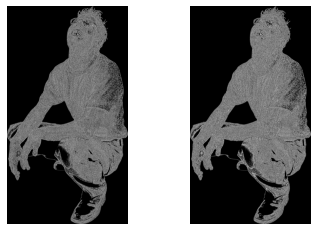

In [ ]:
lp1 = np.array([[0,1,0], [1,-4,1],[0,1,0]], dtype=int) # at a = 0
lp2 = np.array([[1,1,1], [1,-8,1],[1,1,1]], dtype=int) # at a = 0.5

laplace1 = convolve2d(image,lp1)
laplace2 = convolve2d(image,lp2)
plt.subplot(1,2,1), plt.imshow(laplace1, cmap='gray'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(laplace2, cmap='gray'), plt.axis('off')


Roberts operator


(<matplotlib.axes._subplots.AxesSubplot at 0x7f306fff9f50>,
 (-0.5, 1827.5, 3308.5, -0.5))

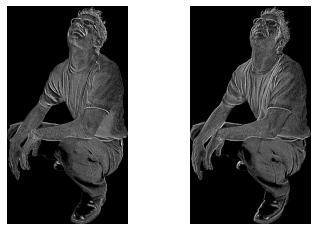

In [ ]:
r1 = np.array([[0,1],[-1,0]], dtype=int)
r2 = np.array([[1,0],[0,-1]], dtype=int)

robert1 = convolve(image,r1)
robert2 = convolve(image,r2)

plt.subplot(1,2,1), plt.imshow(robert1, cmap='gray'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(robert2, cmap='gray'), plt.axis('off')

